In [1]:
# Katarzyna Stojek

# python 3.11.2
# numpy 1.24.2
# scipy 1.10.1
# matplotlib 3.7.1
# imageio 2.29.0

import numpy as np
import scipy.fftpack as ffp
import scipy.linalg as spl
import matplotlib.pyplot as plt
import imageio as io

Cel

Celem zadania było zapoznanie się z zastosowaniem metod analizy sygnału w kompresjii plików, w szczególności obrazów w formacie JPEG a także ich praktyczne zastosowanie. Dodatkowo zobaczenie jaki wpływ na efekty ma dobór rozmiaru bloku a także różne kwantyzatory.

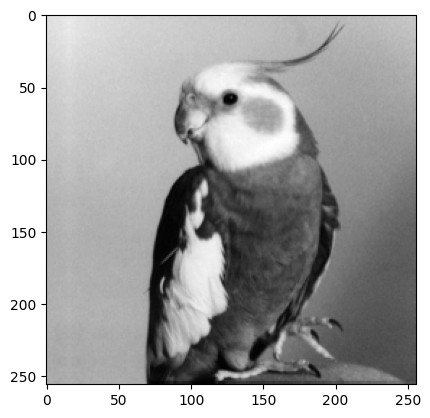

In [2]:
im = io.v3.imread('bird.pgm').astype('float')

f = plt.figure()
plt.imshow(im,cmap='gray')

In [3]:
# funkcje do wielowymiarowego DCT
def dct2d(a):
    return ffp.dctn(a, norm='ortho')

def idct2d(a):
    return ffp.idctn(a, norm='ortho')

In [4]:
# Podział obracu na bloki i wykonanie DCT
imsize = im.shape
dct = np.zeros(imsize)
n=8 # standard blocksize is 8x8
# Do 8x8 DCT on image (in-place)
for i in np.r_[:imsize[0]:n]:
    for j in np.r_[:imsize[1]:n]:
        dct[i:(i+n),j:(j+n)] = dct2d( im[i:(i+n),j:(j+n)] )

Text(0.5, 1.0, 'An nxn DCT block')

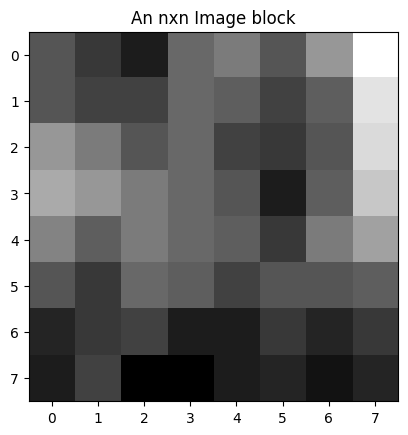

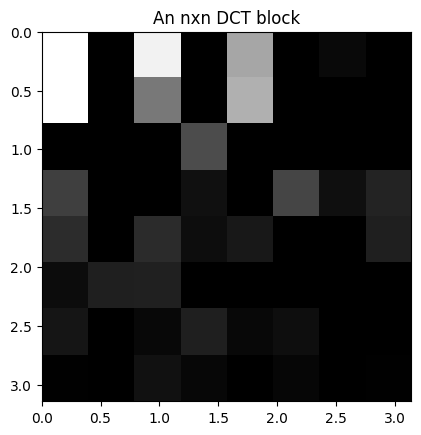

In [5]:
pos = 128

# Extract a block from image
plt.figure()
plt.imshow(im[pos:pos+n,pos:pos+n],cmap='gray')
plt.title( "An nxn Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+n,pos:pos+n],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,np.pi,np.pi,0])
plt.title( "An nxn DCT block")

Text(0.5, 1.0, 'nxn DCTs of the image')

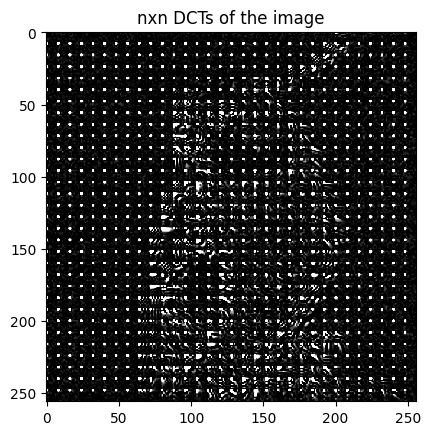

In [6]:
# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "nxn DCTs of the image")

Keeping only 4.881287% of the DCT coefficients


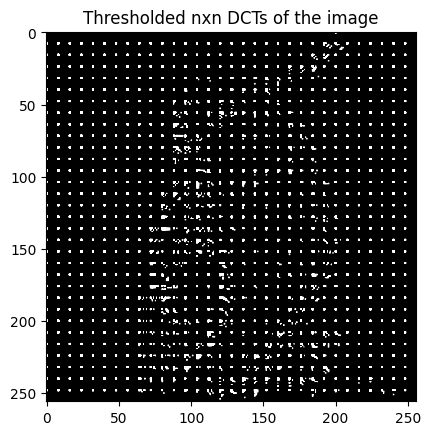

In [7]:
# Threshold
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))

plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded nxn DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

Text(0.5, 1.0, 'nxn quantization of the image')

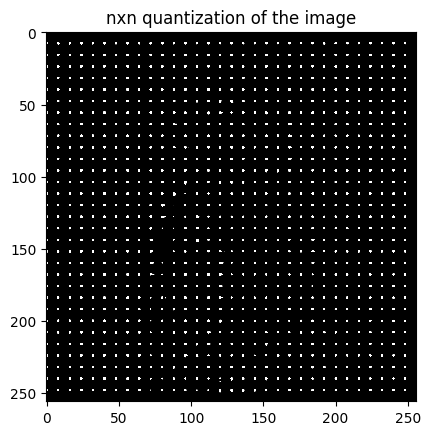

In [8]:
#kwantyzacja
im_q = np.zeros(imsize)
matrix = spl.hilbert(n)
p =1
amatrix = p*8/matrix # macierz do liniowej kwantyzacji wg http://mason.gmu.edu/~ttr8/Proj6-Part3.html
#imatrix = spl.invhilbert(n)

for i in np.r_[:imsize[0]:n]:
    for j in np.r_[:imsize[1]:n]:
        im_q[i:(i+n),j:(j+n)] = (dct_thresh[i:(i+n),j:(j+n)]-128)/amatrix
        
plt.figure()
plt.imshow(im_q,cmap='gray',vmax = np.max(im_q)*0.01,vmin = 0)
plt.title( "nxn quantization of the image")

Text(0.5, 1.0, 'nxn dequantization of the image')

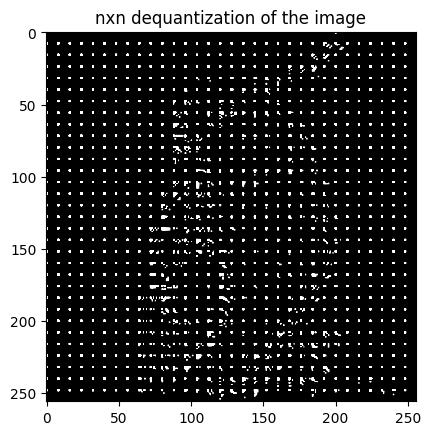

In [9]:
#dekwantyzacja
im_iq = np.zeros(imsize)

for i in np.r_[:imsize[0]:n]:
    for j in np.r_[:imsize[1]:n]:
        im_iq[i:(i+n),j:(j+n)] = im_q[i:(i+n),j:(j+n)]*amatrix+128
        
plt.figure()
plt.imshow(im_iq,cmap='gray',vmax = np.max(im_iq)*0.01,vmin = 0)
plt.title( "nxn dequantization of the image")

Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

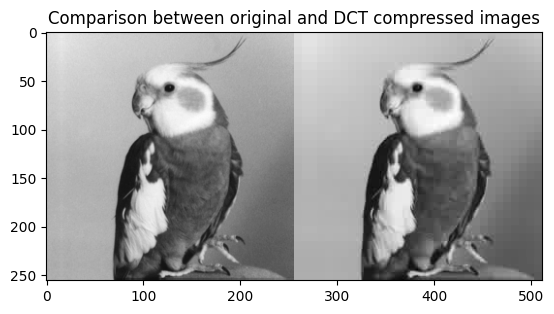

In [10]:
im_dct = np.zeros(imsize)

for i in np.r_[:imsize[0]:n]:
    for j in np.r_[:imsize[1]:n]:
        im_dct[i:(i+n),j:(j+n)] = idct2d(im_iq[i:(i+n),j:(j+n)])

plt.imshow( np.hstack( (im, im_dct) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )

Udało się skutecznie skompresować a następnie wydobyć obraz wykorzystując DCT i kwantyzację obrazu (kompresja) a następnie przesy do nich odwrotne (wydobycie obrazu). Obraz po kompresjii jest bardzo podobny do oryginału, możliwe, że odrobinę mniej wyraźny, ale jest to spodziewane przy kompresjii ponieważ tracimy dane. Ostatecznie uważam natomiast, że efekt jest zadowalający.

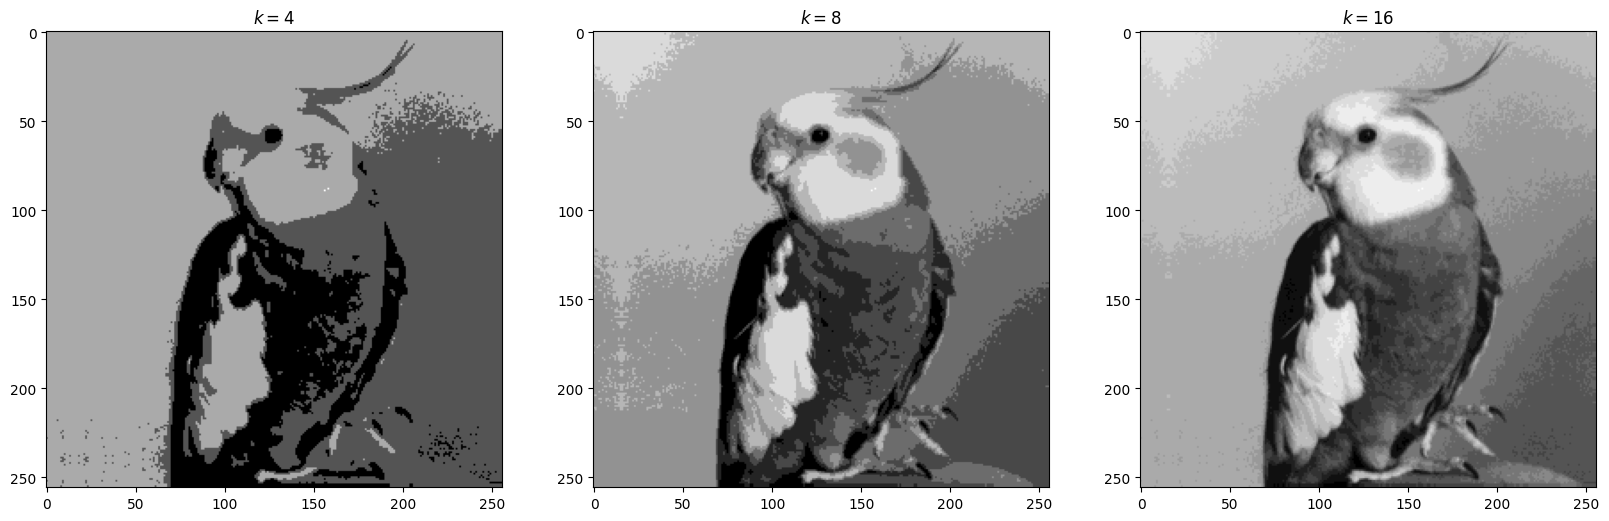

In [17]:
# eksperymenty z obrazem i kwantyzają 
factors = 2**np.arange(2, 5)
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
for k, ax in zip(factors, axis):
    bins = np.linspace(0, im.max(), k)
    image = np.digitize(im, bins)
    image = (np.vectorize(bins.tolist().__getitem__)
                         (image-1).astype(int))
    ax.imshow(image,cmap='gray')
    ax.set_title('$k = {}$'.format(k))

Powtórzenie dla innego rozmiaru bloku:

Text(0.5, 1.0, 'nxn DCTs of the image')

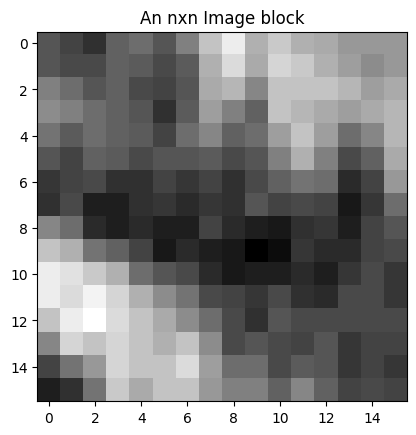

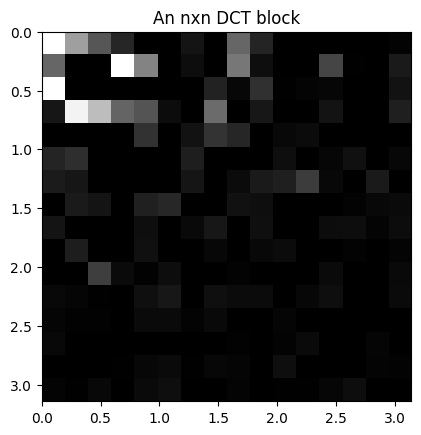

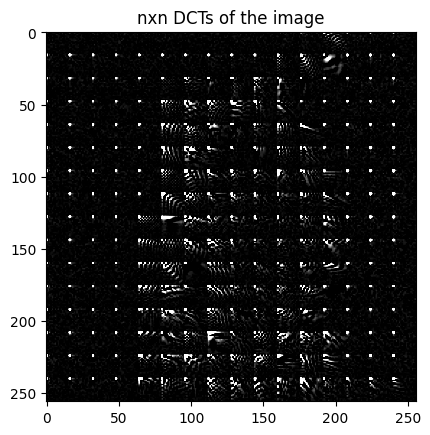

In [12]:
n=16 # zmieniam rozmiar bloku na 16x16

for i in np.r_[:imsize[0]:n]:
    for j in np.r_[:imsize[1]:n]:
        dct[i:(i+n),j:(j+n)] = dct2d( im[i:(i+n),j:(j+n)] )

pos = 128

# Extract a block from image
plt.figure()
plt.imshow(im[pos:pos+n,pos:pos+n],cmap='gray')
plt.title( "An nxn Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+n,pos:pos+n],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,np.pi,np.pi,0])
plt.title( "An nxn DCT block")

# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "nxn DCTs of the image")

Keeping only 2.215576% of the DCT coefficients


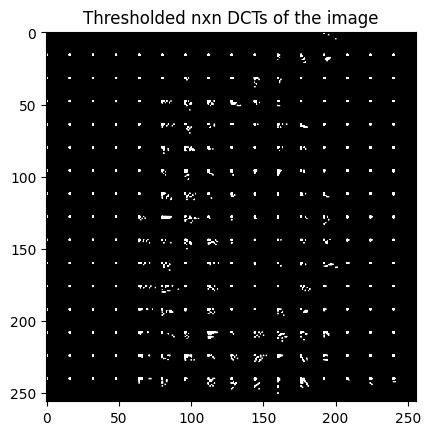

In [13]:
# Threshold
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))

plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded nxn DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

Text(0.5, 1.0, 'nxn quantization of the image')

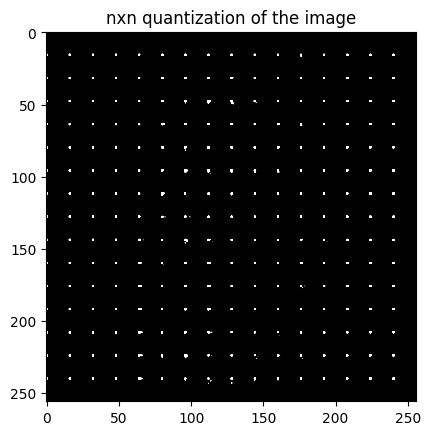

In [14]:
#kwantyzacja
im_q = np.zeros(imsize)
matrix = spl.hilbert(n)
p =1
amatrix = p*8/matrix # macierz do liniowej kwantyzacji wg http://mason.gmu.edu/~ttr8/Proj6-Part3.html
#imatrix = spl.invhilbert(n)

for i in np.r_[:imsize[0]:n]:
    for j in np.r_[:imsize[1]:n]:
        im_q[i:(i+n),j:(j+n)] = (dct_thresh[i:(i+n),j:(j+n)]-128)/amatrix
        
plt.figure()
plt.imshow(im_q,cmap='gray',vmax = np.max(im_q)*0.01,vmin = 0)
plt.title( "nxn quantization of the image")

Text(0.5, 1.0, 'nxn dequantization of the image')

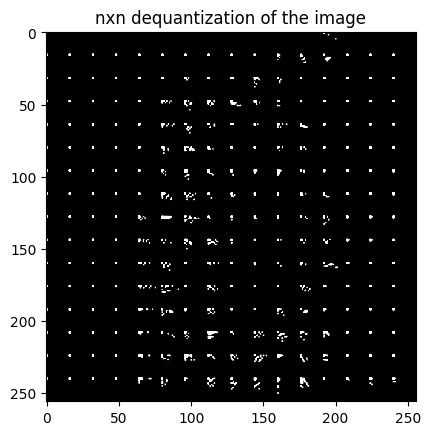

In [15]:
#dekwantyzacja
im_iq = np.zeros(imsize)

for i in np.r_[:imsize[0]:n]:
    for j in np.r_[:imsize[1]:n]:
        im_iq[i:(i+n),j:(j+n)] = im_q[i:(i+n),j:(j+n)]*amatrix+128
        
plt.figure()
plt.imshow(im_iq,cmap='gray',vmax = np.max(im_iq)*0.01,vmin = 0)
plt.title( "nxn dequantization of the image")

Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

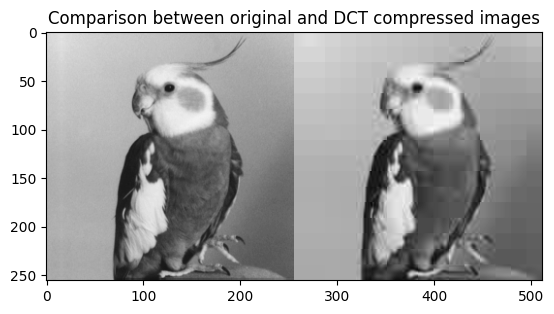

In [16]:
im_dct = np.zeros(imsize)

for i in np.r_[:imsize[0]:n]:
    for j in np.r_[:imsize[1]:n]:
        im_dct[i:(i+n),j:(j+n)] = idct2d(im_iq[i:(i+n),j:(j+n)])

plt.imshow( np.hstack( (im, im_dct) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )

Zwiększenie rozmiaru bloku doprowadziło do zmniejszenia jakości obrazu po kompresjii. Jest on bardziej rozmyty. Dodatkowo w prawym dolnym rogu zwłaszcza widoczne są kształty kwadratowe. Mniejszy rozmiar bloku sprawdzał się zatem dużo lepiej pod względem efektów.

Inna macierz kwantyzacji

Text(0.5, 1.0, 'nxn DCTs of the image')

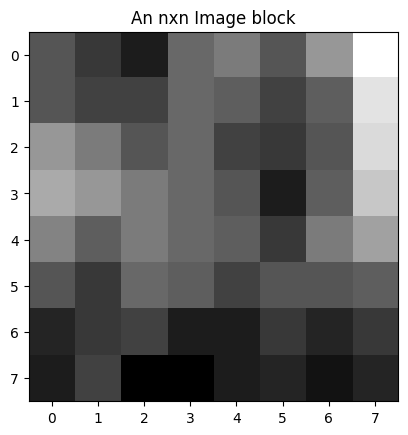

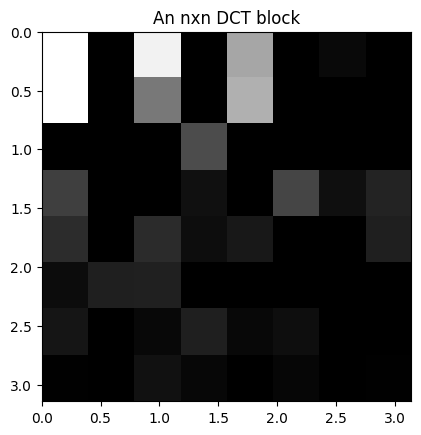

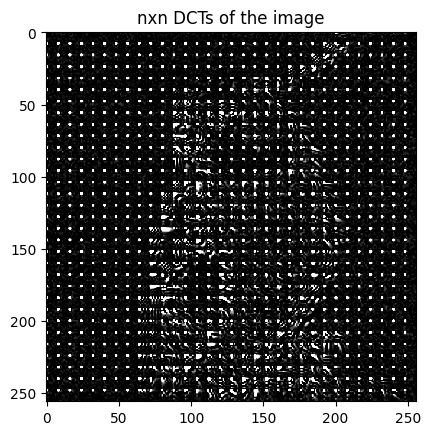

In [21]:
n=8
for i in np.r_[:imsize[0]:n]:
    for j in np.r_[:imsize[1]:n]:
        dct[i:(i+n),j:(j+n)] = dct2d( im[i:(i+n),j:(j+n)] )

pos = 128

# Extract a block from image
plt.figure()
plt.imshow(im[pos:pos+n,pos:pos+n],cmap='gray')
plt.title( "An nxn Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+n,pos:pos+n],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,np.pi,np.pi,0])
plt.title( "An nxn DCT block")

# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "nxn DCTs of the image")

Keeping only 4.881287% of the DCT coefficients


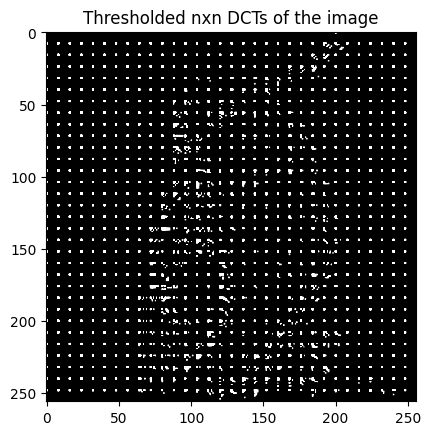

In [22]:
# Threshold
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))

plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded nxn DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

Text(0.5, 1.0, 'nxn quantization of the image')

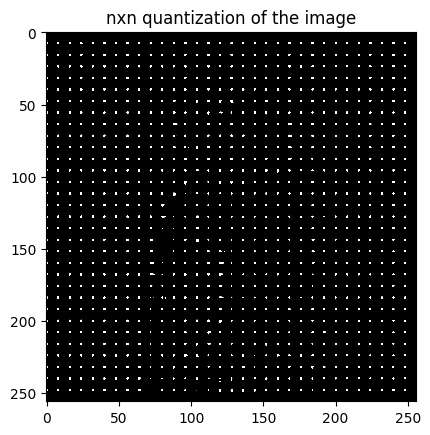

In [24]:
#kwantyzacja
im_q = np.zeros(imsize)
# diff_matrix = (maybe) one used in jpeg wg http://mason.gmu.edu/~ttr8/Proj6-Part3.html
diff_matrix = p*np.array([[16, 11, 10, 16, 24, 40, 51, 61], [12, 12, 14, 19, 26, 58, 60, 55],
       [14, 13, 16, 24, 40, 57, 69, 56],[14, 17, 22, 29, 51, 87, 80, 62],[18, 22, 37, 56, 68, 109, 103, 77],
       [24, 35, 55, 64, 81, 104, 113, 92],[49, 64, 78, 87, 103, 121, 120, 101],[72, 92, 95, 98, 112, 100, 103, 99]])

for i in np.r_[:imsize[0]:n]:
    for j in np.r_[:imsize[1]:n]:
        im_q[i:(i+n),j:(j+n)] = (dct_thresh[i:(i+n),j:(j+n)]-128)/diff_matrix
        
plt.figure()
plt.imshow(im_q,cmap='gray',vmax = np.max(im_q)*0.01,vmin = 0)
plt.title( "nxn quantization of the image")

Text(0.5, 1.0, 'nxn dequantization of the image')

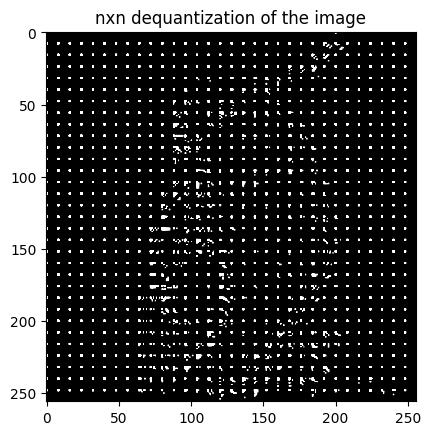

In [25]:
#dekwantyzacja
im_iq = np.zeros(imsize)

for i in np.r_[:imsize[0]:n]:
    for j in np.r_[:imsize[1]:n]:
        im_iq[i:(i+n),j:(j+n)] = im_q[i:(i+n),j:(j+n)]*diff_matrix+128
        
plt.figure()
plt.imshow(im_iq,cmap='gray',vmax = np.max(im_iq)*0.01,vmin = 0)
plt.title( "nxn dequantization of the image")

Text(0.5, 1.0, 'Comparison between original and DCT compressed image')

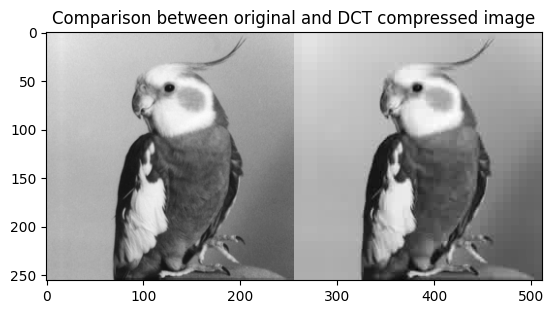

In [28]:
im_dct = np.zeros(imsize)

for i in np.r_[:imsize[0]:n]:
    for j in np.r_[:imsize[1]:n]:
        im_dct[i:(i+n),j:(j+n)] = idct2d(im_iq[i:(i+n),j:(j+n)])

plt.imshow( np.hstack( (im, im_dct,) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed image" )

Obraz po kompresji jest bardzo zbliżony do oryginalnego. Macierz alternatywna sprawdziła się zatem dobrze. Nie dostrzegam gołym okiem większych różnic pomiędzy tą a poprzednią macierzą kwantyzacji.

Wnioski 

Udało się wykonać wszystkie otrzymane zadania. Porównano efekty wykorzystania różnych rozmiarów bloków a także dwa rodzaje macierzy kompresji.